In [319]:
import pandas as pd

In [320]:
binary_hydride = pd.read_table('./new-二元氢化物.dat', sep=',')
binary_hydride.sort_values(by=['Tc(K)', '压力(GPa)'], ascending=True, inplace=True)
binary_hydride.drop(labels=[4,8], inplace=True)
binary_hydride.drop_duplicates(subset=['化合物', 'theoryorexp'], keep='last', inplace=True)

binary_hydride.head(5)
binary_hydride.shape

(33, 8)

In [321]:
# 找不到着两个结构的文献
# null	(Y,Ce)H9	clathrate	null	140	120	exp	null
# null	(La,Ce)H10	clathrate	null	175	155	exp	null
ternary_hydride = pd.read_table('./new-三元氢化物总结.dat', sep='\t')
ternary_hydride.drop(labels=9, inplace=True)
ternary_hydride

,年份,化合物,类型,空间群,压力(GPa),Tc(K),theoryorexp,doi
0,1974,Pd0.55Cu0.45H0.04,NaN,NaN,0.000101,16.6,exp,NaN
1,1976,HfV2H,NaN,NaN,0.000101,4.8,exp,https://doi.org/10.1103/PhysRevLett.37.1410
2,1996,NaH4C60,NaN,NaN,0.000101,15.0,exp,https://doi.org/10.1016/0038-1098(96)00306-7
3,2015,BaReH9,NaN,NaN,91.000000,7.0,exp,NaN
4,2016,H3S0.925P0.075,NaN,NaN,250.000000,280.0,theory,https://doi.org/10.1103/PhysRevB.93.224513
5,2019,Li5MoH11,NaN,NaN,160.000000,6.5,exp,NaN
6,2019,Li2MgH16,clathrate,Fd-3m,250.000000,473.0,theory,https://doi.org/10.1103/PhysRevLett.123.097001
7,2020,"(La,Y)H10",clathrate,NaN,183.000000,253.0,exp,NaN
8,2020,"(La,Y)H6",clathrate,NaN,183.000000,237.0,exp,NaN
10,2021,KB2H8,NaN,Fm-3m,12.000000,146.0,theory,https://doi.org/10.1103/PhysRevB.104.L100504


In [322]:
total_hydrides = pd.concat([binary_hydride, ternary_hydride], axis=0)
# print(total_hydrides.shape)

exp_h = total_hydrides[total_hydrides['theoryorexp']=='exp']
theory_h = total_hydrides[total_hydrides['theoryorexp']=='theory']

# print(exp_h.shape)
# print(theory_h.shape)

# total_hydrides[(total_hydrides['压力(GPa)']>200) & (total_hydrides['压力(GPa)']<300)]
print(total_hydrides)

      年份       化合物         类型    空间群     压力(GPa)   Tc(K) theoryorexp  \
19  2019    Hf4H15      layer    NaN   23.000000    4.50         exp   
22  2020      NdH9        NaN    NaN    0.000101    5.00         exp   
25  2020      ZrH3        NaN    NaN   40.000000    6.40         exp   
20  2019       PtH        NaN    NaN   30.000000    7.00         exp   
0   1970    Th4H15  clathrate   I43d    0.000101    8.35         exp   
..   ...       ...        ...    ...         ...     ...         ...   
28  2022  Li2LaH17  clathrate  Fd-3m  160.000000  156.00      theory   
29  2022  Li2ScH20  clathrate   Immm  300.000000  242.00      theory   
30  2022    YCeH20  clathrate   R-3m  300.000000  122.00      theory   
31  2022   LaCeH20  clathrate   R-3m  250.000000  116.00      theory   
32  2022    YCeH18  clathrate  P-6m2  150.000000  173.00      theory   

                                             doi  
19                                           NaN  
22                               

将字符串标签映射为数值

In [323]:
def labels_str2number(inputlables: list[str]):
    """
    input a list[float]
    return a list[int]
    """
    lab_value = []
    for lab in inputlables:
        if lab == 'theory':
            lab_value.append(1)
        elif lab == 'exp':
            lab_value.append(0)
        else:
            lab_value.append(0.5)
    
    return lab_value

33 33 33
32 32 32


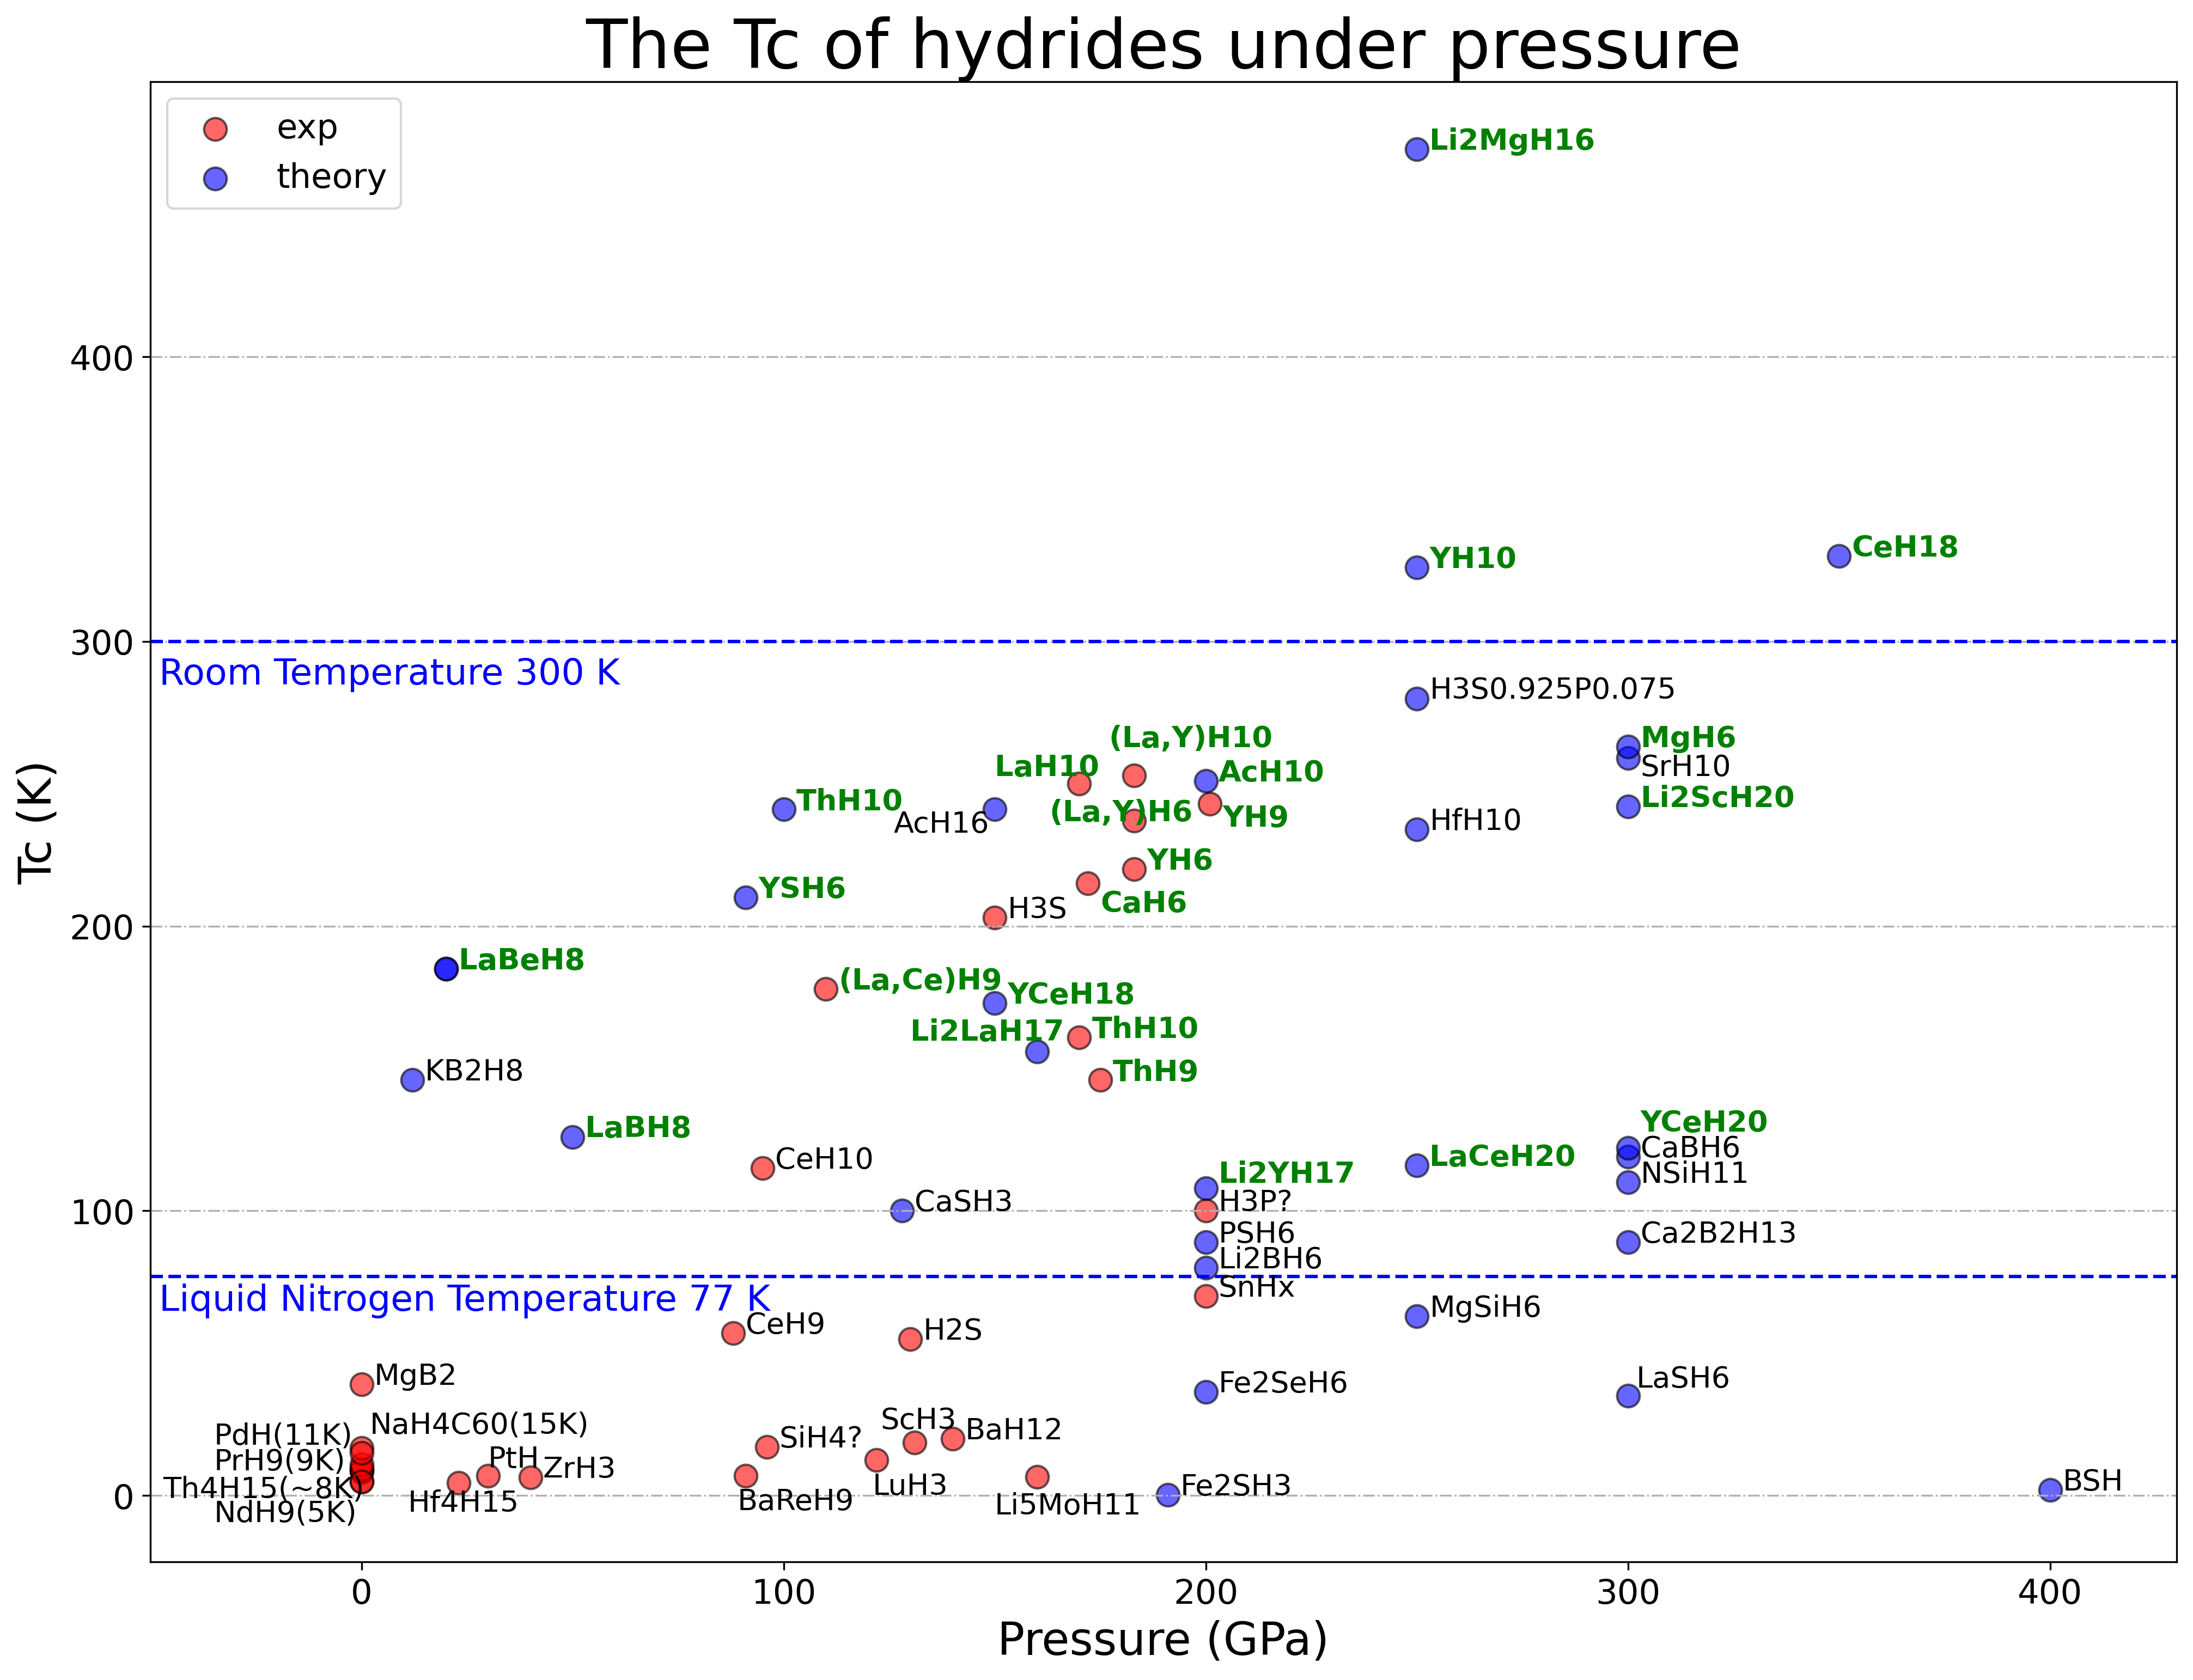

In [324]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12),dpi=300)
plt.xlabel("Pressure (GPa)",  fontsize=20)
plt.xlim((-50,430))
plt.ylabel("Tc (K)",  fontsize=20)
plt.title("The Tc of hydrides under pressure",fontsize=30)
plt.tick_params(labelsize=15)
plt.grid(axis="y", linestyle='-.')

# Experiment
exp_X = exp_h['压力(GPa)'].tolist()
exp_Y = exp_h['Tc(K)'].tolist()
exp_annotations=exp_h['化合物'].tolist()
print(len(exp_X), len(exp_Y), len(exp_annotations))

plt.scatter(exp_X, exp_Y, s=100, c='r', label='exp', alpha=0.6, edgecolors='Black')

for i, label in enumerate(exp_annotations):
    if label not in ['NbH0.69', 'Pd0.55Cu0.45H0.04', 'HfV2H']:
        if label == 'PdH':
            plt.annotate(label+'(11K)', (exp_X[i]-35, exp_Y[i]+7), fontsize=13)
        elif label == 'PrH9':
            plt.annotate(label+'(9K)', (exp_X[i]-35, exp_Y[i]+0), fontsize=13)
        elif label == 'Th4H15':
            plt.annotate(label+'(~8K)', (exp_X[i]-47, exp_Y[i]-9), fontsize=13)
        elif label == 'NdH9':
            plt.annotate(label+'(5K)', (exp_X[i]-35, exp_Y[i]-14), fontsize=13)
        elif label == 'PtH':
            plt.annotate(label, (exp_X[i], exp_Y[i]+3), fontsize=13)
        elif label == 'Hf4H15':
            plt.annotate(label, (exp_X[i]-12, exp_Y[i]-10), fontsize=13)
        elif label == 'ScH3':
            plt.annotate(label, (exp_X[i]-8, exp_Y[i]+5), fontsize=13)
        elif label == 'LuH3':
            plt.annotate(label, (exp_X[i]-1, exp_Y[i]-12), fontsize=13)
        elif label == 'YH9':
            plt.annotate(label, (exp_X[i]+3, exp_Y[i]-8), fontsize=13, color='green', weight='heavy')
        elif label == 'LaH10':
            plt.annotate(label, (exp_X[i]-20, exp_Y[i]+3), fontsize=13, color='green', weight='heavy')
        elif label == 'NaH4C60':
            plt.annotate(label+'(15K)', (exp_X[i]+2, exp_Y[i]+7), fontsize=13)
        elif label == '(La,Y)H10':
            plt.annotate(label, (exp_X[i]-6, exp_Y[i]+10), fontsize=13, color='green', weight='heavy')
        elif label == '(La,Y)H6':
            plt.annotate(label, (exp_X[i]-20, exp_Y[i]), fontsize=13, color='green', weight='heavy')
        elif label == 'CaH6':
            plt.annotate(label, (exp_X[i]+3, exp_Y[i]-10), fontsize=13, color='green', weight='heavy')
        elif label == 'BaReH9':
            plt.annotate(label, (exp_X[i]-2, exp_Y[i]-12), fontsize=13)
        elif label == 'Li5MoH11':
            plt.annotate(label, (exp_X[i]-10, exp_Y[i]-13), fontsize=13)
        else:
            dst_type = total_hydrides[total_hydrides['化合物']==label]['类型']
            if 'clathrate' in dst_type.to_string():
                plt.annotate(label, (exp_X[i]+3, exp_Y[i]), fontsize=13, color='green', weight='heavy')
            else:
                plt.annotate(label, (exp_X[i]+3, exp_Y[i]), fontsize=13,)
# Theory 
theory_X = theory_h['压力(GPa)'].tolist()
theory_Y = theory_h['Tc(K)'].tolist()
theory_annotations=theory_h['化合物'].tolist()
print(len(theory_X), len(theory_Y), len(theory_annotations))

# alpha 点的透明度
# linewidths 散点的边缘线宽
# edgecolors 散点的边缘颜色
plt.scatter(theory_X, theory_Y, s=100, c='b', label='theory', alpha=0.6, edgecolors='Black')

for i, label in enumerate(theory_annotations):
    if label not in ['xx',]:
        if label == 'SrH10':
            plt.annotate(label, (theory_X[i]+3, theory_Y[i]-6), fontsize=13)
        elif label == 'AcH16':
            plt.annotate(label, (theory_X[i]-24, theory_Y[i]-8), fontsize=13)
        elif label == 'Li2LaH17':
            plt.annotate(label, (theory_X[i]-30, theory_Y[i]+4), fontsize=13, color='green', weight='heavy')
        elif label == 'Li2YH17':
            plt.annotate(label, (theory_X[i]+3, theory_Y[i]+2), fontsize=13, color='green', weight='heavy')
        elif label == 'YCeH20':
            plt.annotate(label, (theory_X[i]+3, theory_Y[i]+6), fontsize=13, color='green', weight='heavy')
        elif label == 'LaSH6':
            plt.annotate(label, (theory_X[i]+2, theory_Y[i]+3), fontsize=13)
        else:
            dst_type = total_hydrides[total_hydrides['化合物']==label]['类型']
            if 'clathrate' in dst_type.to_string():
                plt.annotate(label, (theory_X[i]+3, theory_Y[i]), fontsize=13, color='green', weight='heavy')
            else:
                plt.annotate(label, (theory_X[i]+3, theory_Y[i]), fontsize=13,)


plt.plot([-50, 430], [77, 77], linestyle='dashed', c='b')
plt.text(-48, 285, 'Room Temperature 300 K', fontsize=16, color='b')
plt.plot([-50, 430], [300, 300], linestyle='dashed', c='b')
plt.text(-48, 65, 'Liquid Nitrogen Temperature 77 K', fontsize=16, color='b')

# 最终显示
plt.legend(loc='upper left', fontsize=15)
plt.show()

In [325]:
import pandas as pd
score = [[34,67,87],[68,98,58],[75,73,86],[94,59,81]]
name = ['laoba','laoliu','xiaoxiao']
course = ['chinese','math','english','history']
mydata = pd.DataFrame(data=score,columns=name,index=course)#指定行列名
print(mydata)

 #选择两列，此时必须用[]将两列括起来，否则报错
mydata[['laoba','laoliu']]
mydata.loc[:,'laoba']
mydata.iloc[0,:]


         laoba  laoliu  xiaoxiao
chinese     34      67        87
math        68      98        58
english     75      73        86
history     94      59        81


laoba       34
laoliu      67
xiaoxiao    87
Name: chinese, dtype: int64